In [1]:
import pandas as pd 
import numpy as np 
import os
import sys
sys.path.append(os.path.abspath(".."))
from limma import batchEffectCorrection
from MetNormalizer import MetNorm
#Combat Reference
from inmoose.pycombat import pycombat_norm
from utils.utility_functions import *
from sklearn.model_selection import GridSearchCV

**preprocess data**
1. set index as signal position

2. remove additional metadata from original data matrix

3. set corresponding metadata index for matching

4. remove blanks and outlier sample  

In [2]:
D = pd.read_csv("Data/2-peak_area_after_filling_missing_values.csv").set_index("position").drop(columns=['mz','rt','name']).T
M = pd.read_csv("Data/sample_metadata_all_batches.csv").set_index("sample_name")
D = D[~D.index.str.contains("_B_")]
M = M[~M.index.str.contains("_B_")]
D = D.drop(index='AOU_S_0104')
M = M.drop(index='AOU_S_0104')

In [3]:
D.head()

position,1,2,3,4,5,6,7,8,9,10,...,13922,13923,13924,13925,13926,13927,13928,13929,13930,13931
AOU_NIST_001,44.0,1395975.0,60327104.0,519074.0,616369.0,5562699.0,44.0,108192632.0,7092270.0,105404568.0,...,740.0,44.0,692.0,44.0,747.0,5204.0,44.0,883.0,2116.0,2391.0
AOU_NIST_004,44.0,1063576.0,60495892.0,507441.0,565347.0,8757976.0,44.0,123438624.0,6837679.0,115736440.0,...,2606.0,44.0,44.0,44.0,1685.0,44.0,2088.0,1427.0,877.0,703.0
AOU_HHEAR_P1_001,44.0,420824128.0,62026848.0,44.0,265105584.0,157149936.0,44.0,103357584.0,9560276.0,132152808.0,...,2489.0,44.0,1513.0,44.0,2098.0,44.0,44.0,1531.0,44.0,3302.0
AOU_HHEAR_P2_010,1016973.0,332299232.0,61845612.0,5937250.0,192804560.0,159424384.0,44.0,119483872.0,10948127.0,138915488.0,...,1412.0,44.0,44.0,44.0,44.0,1472.0,1121.0,3290.0,1589.0,4978.0
AOU_SP_001,4633218.0,1161562.0,56210872.0,14166810.0,505266.0,1362634.0,453177.0,119620536.0,9588226.0,130074648.0,...,1137.0,839.0,2272.0,909.0,934.0,5152.0,3267.0,3340.0,1872.0,2086.0


In [4]:
M.head()

,injection_order,sample_type,sample_type_original,batch,batch_folder
sample_name,,,,,
AOU_NIST_001,2,nist,nist,1,AOU_0001
AOU_HHEAR_P1_001,3,hhear p1,hhear p1,1,AOU_0001
AOU_SP_001,4,sp,sp,1,AOU_0001
AOU_S_0001,5,study,study,1,AOU_0001
AOU_S_0002,6,study,study,1,AOU_0001


**Uncorrected Data**

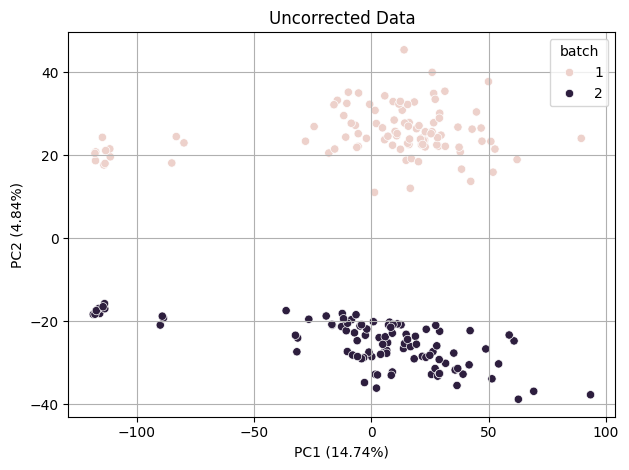

In [5]:
pca_plot(D,M,title='Uncorrected Data',hue='batch')

**Combat - Reference**

In [6]:
batch = M.loc[D.index,'batch']
combat = pycombat_norm(D.T,batch)

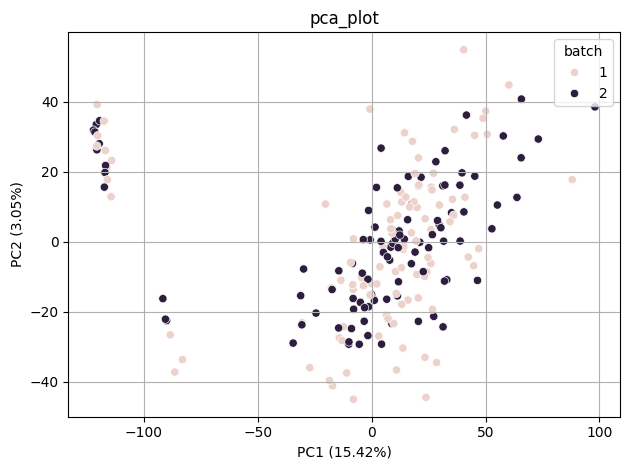

In [7]:
pca_plot(combat.T,M,hue='batch')

**Limma**

In [8]:
limma = batchEffectCorrection(D.T,M)

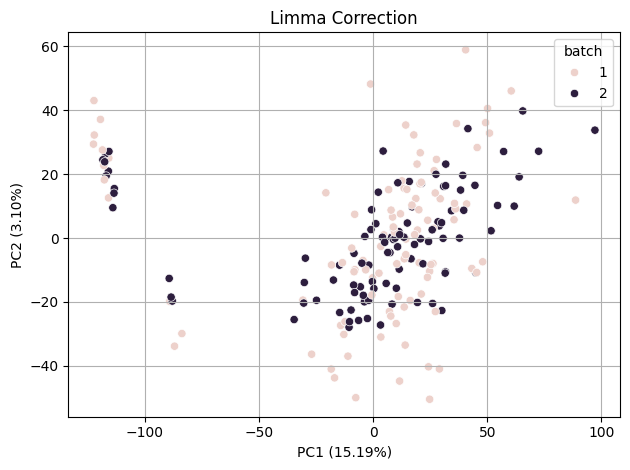

In [9]:
pca_plot(limma,M,title="Limma Correction",hue='batch')

**MetNormalizer**

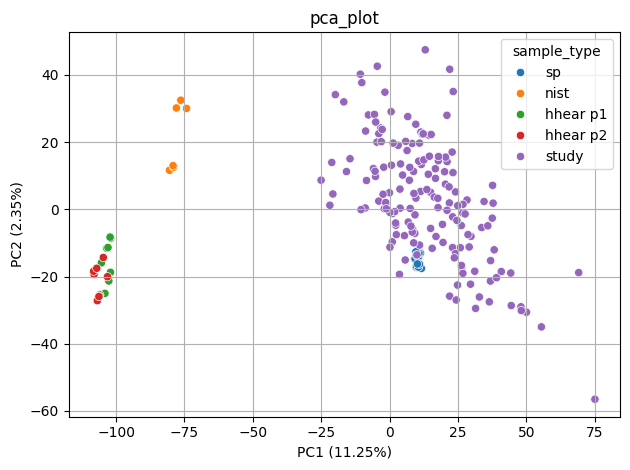

In [ ]:
metnorm = MetNorm(D,M)
results = metnorm.fit_transform()

**SERRF**

- Developed using separate multiprocessing script. Only results displayed below.

- Total Elapsed Time: [1:26:23<00:00,  2.69it/s]

![SERRF Output](</Users/julianaileru/Documents/GitHub/batch-effect-correction-algorithms/Data/Screenshot 2025-06-04 at 10.09.52 AM.png>)

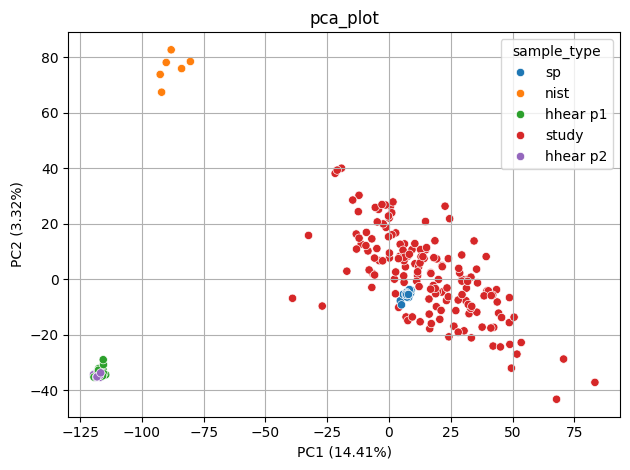

In [37]:
serrf = pd.read_csv("Data/serrf_imp.csv").reset_index()
serrf = serrf.rename(columns={"Unnamed: 0":'name'})
serrf = serrf.drop(columns=['index'])
serrf = serrf.set_index("name")
pca_plot(serrf,M,hue='sample_type')